In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [124]:
df = pd.read_csv('../dataset/Travel.csv')

In [125]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [126]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [127]:
null_columns = [feature for feature in df.columns if df[feature].isnull().sum()>0]
null_columns

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [128]:
features_null_percentage = [(feature,np.round(df[feature].isnull().mean()*100,5), "% missing values") for feature in df.columns if df[feature].isnull().sum()>0]

In [129]:
features_null_percentage

[('Age', 4.62357, '% missing values'),
 ('TypeofContact', 0.51146, '% missing values'),
 ('DurationOfPitch', 5.13502, '% missing values'),
 ('NumberOfFollowups', 0.92062, '% missing values'),
 ('PreferredPropertyStar', 0.53191, '% missing values'),
 ('NumberOfTrips', 2.86416, '% missing values'),
 ('NumberOfChildrenVisiting', 1.35025, '% missing values'),
 ('MonthlyIncome', 4.76678, '% missing values')]

In [130]:
df.head(2)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0


In [131]:

df.Age.fillna(df.Age.median(), inplace=True)
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)
df.NumberOfFollowups.fillna(df.NumberOfChildrenVisiting.median(), inplace=True)
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.median(), inplace = True)
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.median(),inplace=True)
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [132]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [133]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']


In [134]:
discrete_features = [feature for feature in num_features if len(df[feature].unique())>25]
continous_features = [feature for feature in num_features if feature not in discrete_features]

In [135]:
print(num_features)
print(cat_features)
print(discrete_features)
print(continous_features)

['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']
['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']
['CustomerID', 'Age', 'DurationOfPitch', 'MonthlyIncome']
['ProdTaken', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']


In [136]:
df.drop('CustomerID',axis=1,inplace=True)

In [137]:
for i in cat_features:
    print(df[i].value_counts())
    print("=============================")

TypeofContact
Self Enquiry       3469
Company Invited    1419
Name: count, dtype: int64
Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64
Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64
ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64


In [138]:
df['Gender'] = df['Gender'].str.replace("Fe Male","Female")

In [139]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


In [141]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [142]:
cat_features

['TypeofContact',
 'Occupation',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [143]:
df['Gender'].value_counts()

Gender
1    2916
0    1972
Name: count, dtype: int64

In [144]:
df['Totalvisiter'] = df['NumberOfChildrenVisiting'] + df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'],axis=1,inplace=True)

In [145]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
num_features

['ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'Gender',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'MonthlyIncome',
 'Totalvisiter']

In [146]:
from sklearn.model_selection import train_test_split
x = df.drop('ProdTaken',axis=1)
y = df['ProdTaken']

In [147]:
x

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,Totalvisiter
0,41.0,Self Enquiry,3,6.0,Salaried,0,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,1,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,1,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,0,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,1,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,3,9.0,Small Business,1,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,Manager,26576.0,4.0
4884,28.0,Company Invited,1,31.0,Salaried,1,5.0,Basic,3.0,Single,3.0,1,3,1,Executive,21212.0,6.0
4885,52.0,Self Enquiry,3,17.0,Salaried,0,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,19.0,Self Enquiry,3,16.0,Small Business,1,4.0,Basic,3.0,Single,3.0,0,5,0,Executive,20289.0,5.0


In [148]:
y

0       1
1       0
2       1
3       0
4       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4888, dtype: int64

In [149]:
numeric_x = [feature for feature in x.columns if x[feature].dtype != 'O']
cat_x = [feature for feature in x.columns if x[feature].dtype == 'O']

In [150]:
numeric_x , cat_x

(['Age',
  'CityTier',
  'DurationOfPitch',
  'Gender',
  'NumberOfFollowups',
  'PreferredPropertyStar',
  'NumberOfTrips',
  'Passport',
  'PitchSatisfactionScore',
  'OwnCar',
  'MonthlyIncome',
  'Totalvisiter'],
 ['TypeofContact',
  'Occupation',
  'ProductPitched',
  'MaritalStatus',
  'Designation'])

In [151]:
x.isnull().sum()

Age                       0
TypeofContact             0
CityTier                  0
DurationOfPitch           0
Occupation                0
Gender                    0
NumberOfFollowups         0
ProductPitched            0
PreferredPropertyStar     0
MaritalStatus             0
NumberOfTrips             0
Passport                  0
PitchSatisfactionScore    0
OwnCar                    0
Designation               0
MonthlyIncome             0
Totalvisiter              0
dtype: int64

In [152]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [153]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

processor = ColumnTransformer(
    [
        ('OneHotEncoder',OneHotEncoder(drop='first'),cat_x),
        ('scaler',StandardScaler(),numeric_x)
    ],remainder = 'passthrough'
)

In [154]:
x_train = processor.fit_transform(x_train)

In [155]:
x_test = processor.transform(x_test)

In [156]:
pd.DataFrame(x_train).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
dtype: int64

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,f1_score,accuracy_score,precision_score,recall_score,roc_auc_score


In [158]:
def estimator(true,predict):
    acc = accuracy_score(true,predict)
    f1= f1_score(true,predict,average='weighted')
    pre_score = precision_score(true,predict)
    recall = recall_score(true,predict)
    roc = roc_auc_score(true,predict)
    return {'accurancy : ': acc ,'f1_score' : f1,'precision_score' : pre_score,'recall_score':recall,'roc_auc_score':roc}

In [163]:
models  = {
    'RandomForestClasifier' : RandomForestClassifier(),
    'GradientBoosting' : GradientBoostingClassifier(),
    'LogisticRegression' : LogisticRegression(),
    'DecisionTreeClassifier' : DecisionTreeClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    est1 = estimator(y_train,y_train_pred)
    est2 = estimator(y_test,y_test_pred)
    print("The model is : ", list(models.keys())[i])
    for key,value in est1.items():
        print(f"{key}  : {value}")
    
    print()

    for key,value in est2.items():
        print(f"{key}  : {value}")


    print("============================================")

The model is :  RandomForestClasifier
accurancy :   : 1.0
f1_score  : 1.0
precision_score  : 1.0
recall_score  : 1.0
roc_auc_score  : 1.0

accurancy :   : 0.9212678936605317
f1_score  : 0.9142429846178383
precision_score  : 0.9672131147540983
recall_score  : 0.6178010471204188
roc_auc_score  : 0.8063592274992183
The model is :  GradientBoosting
accurancy :   : 0.889769820971867
f1_score  : 0.8767480890758947
precision_score  : 0.8669950738916257
recall_score  : 0.4828532235939643
roc_auc_score  : 0.732938714909211

accurancy :   : 0.8548057259713702
f1_score  : 0.8333988068995571
precision_score  : 0.7692307692307693
recall_score  : 0.36649214659685864
roc_auc_score  : 0.669904268978226
The model is :  LogisticRegression
accurancy :   : 0.8452685421994884
f1_score  : 0.8201427749048084
precision_score  : 0.691358024691358
recall_score  : 0.30727023319615915
roc_auc_score  : 0.6379167890281331

accurancy :   : 0.8374233128834356
f1_score  : 0.8109689708108703
precision_score  : 0.690476

In [164]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [165]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [168]:
auc_models = [
    ('rf',RandomForestClassifier(),rf_params)
]

In [169]:
from sklearn.model_selection import RandomizedSearchCV
best_model = {}
for name,model,params in auc_models:
    random = RandomizedSearchCV(
        estimator= model,
        param_distributions=params,
        cv = 3,
        n_iter=100,
        n_jobs=-1,
        verbose=2

    )

    random.fit(x_train,y_train)

    best_model[name] = random.best_params_

for model_name in best_model:
    print(f"The best parameter is {model_name} -------------")

    print(best_model[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
The best parameter is rf -------------
{'n_estimators': 100, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}


In [175]:
selected_models = {
    'RandomForestClassifier':RandomForestClassifier()
}

In [176]:
for i in range(len(list(selected_models))):
    smodel = list(selected_models.values())[i]

    smodel.fit(x_train,y_train)
    sy_train_pred = smodel.predict(x_train)
    sy_test_pred = smodel.predict(x_test)

    sest1 = estimator(y_train,sy_train_pred)
    sest2 = estimator(y_test,sy_test_pred)

    print("The model is : ", list(selected_models.keys())[i])
    for key,value in sest1.items():
        print(f"{key}  : {value}")
    
    print()

    for key,value in sest2.items():
        print(f"{key}  : {value}")


    print("============================================")

The model is :  RandomForestClassifier
accurancy :   : 1.0
f1_score  : 1.0
precision_score  : 1.0
recall_score  : 1.0
roc_auc_score  : 1.0

accurancy :   : 0.9192229038854806
f1_score  : 0.9122813382770091
precision_score  : 0.9516129032258065
recall_score  : 0.6178010471204188
roc_auc_score  : 0.8050885794687227


<Figure size 640x480 with 0 Axes>

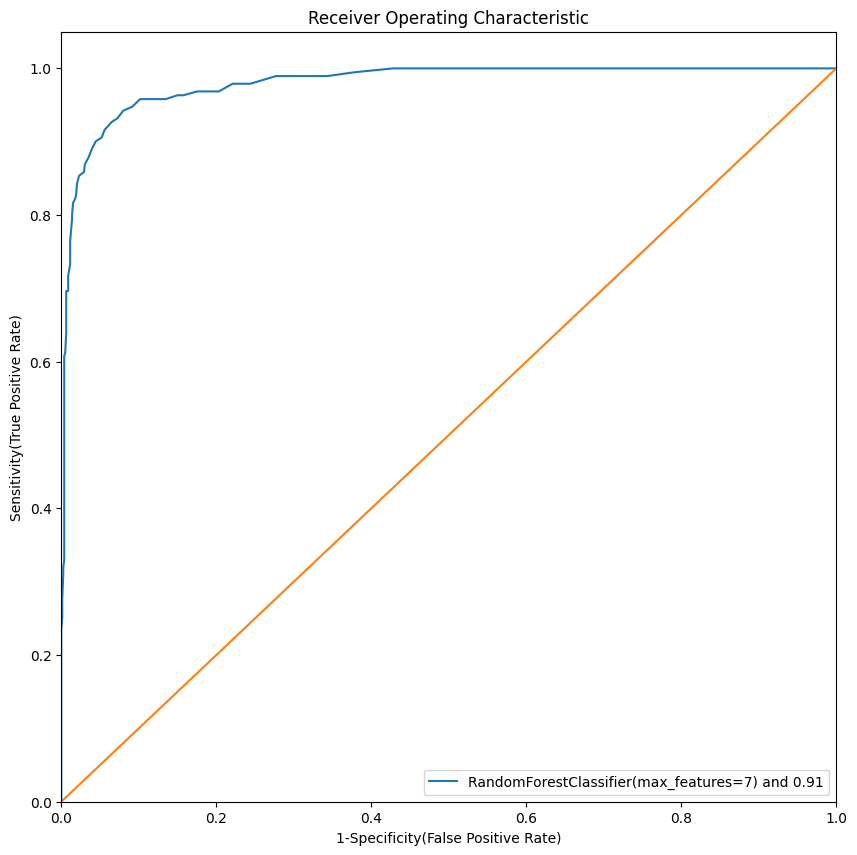

In [189]:
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()
roc_model = [
    {
        'label' : 'RandomForestClassifier',
        'model' : RandomForestClassifier(n_estimators= 100, min_samples_split= 2, max_features= 7, max_depth= None),
        'acc' : 0.91
    },
]

for auc in roc_model:
    model = auc['model']
    model.fit(x_train,y_train)
    plt.figure(figsize=(10,10))
    fpr,tpr,threshold = roc_curve(y_test,model.predict_proba(x_test)[:,1])

    plt.plot(fpr,tpr,label = f"{auc['model']} and {auc['acc']}")

plt.plot([0,1],[0,1])
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# 1 . adaboost_param={
#     "n_estimators":[50,60,70,80,90],
#     "algorithm":['SAMME','SAMME.R']
# }    may be ADABOOST CLASSIFIER

# 2. auc_models = [
# {
#     'label': 'Adaboost Classifier',
#     'model':AdaBoostClassifier(n_estimators=80, algorithm='SAMME'),
#     'auc':  0.6049
# },
    
# ]

In [ ]:
# gradient_params={"loss": ['log_loss','deviance','exponential'],
#              "criterion": ['friedman_mse','squared_error','mse'],
#              "min_samples_split": [2, 8, 15, 20],
#              "n_estimators": [100, 200, 500],
#               "max_depth": [5, 8, 15, None, 10]
#                 }

# for the regression
# gradient_params={"loss": ['squared_error','huber','absolute_error'],
#              "criterion": ['friedman_mse','squared_error','mse'],
#              "min_samples_split": [2, 8, 15, 20],
#              "n_estimators": [100, 200, 500],
#               "max_depth": [5, 8, 15, None, 10],
#             }

In [ ]:
# xgboost_params = {"learning_rate": [0.1, 0.01],
#                   "max_depth": [5, 8, 12, 20, 30],
#                   "n_estimators": [100, 200, 300],
#                   "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

# xgboost_params = {"learning_rate": [0.1, 0.01],
#                   "max_depth": [5, 8, 12, 20, 30],
#                   "n_estimators": [100, 200, 300],
#                   "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}